In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

In [2]:
np.random.seed(450)
array = np.random.randint(100,500, size = 10)
array = np.sort(array)
array

array([149, 163, 201, 344, 379, 398, 399, 402, 411, 426])

In [3]:
run_times = []
def loop(num):
        factor = 1
        for y in range(1, num+1):
            factor = factor * y
        return factor

In [4]:
#Get factorials with iteration runtimes. Using 1000 iterations for more granular timing.
for x in array:
    starttime = time.time()
    for y in range(1000):
        loop(x)
    endtime = time.time()
    runtime = endtime-starttime
    run_times.append(runtime*1000)

In [6]:
def fact(x):
  if x == 1:
    return 1
  else:
    return x * fact(x-1)

In [7]:
#Get factorials with recursion runtimes. Using 1000 iterations for more granular timing.
run_2 = []
for x in array:
    number = float(x)
    starttime = time.time()
    for y in range(1000):
        fact(number)
    endtime = time.time()
    runtime = endtime-starttime
    run_2.append(runtime*1000)

In [10]:
#Get factorials (using fastest method)
factorials = []
for x in array:
    factor = loop(x)
    factorials.append(factor)


In [18]:
data = {"Number": array, 'Factorials': factorials, 'Recursion Time': run_2, 'Loop Time': run_times,}
df = pd.DataFrame(data)
df['Difference']= df['Recursion Time']-df['Loop Time']
df

,Number,Factorials,Recursion Time,Loop Time,Difference
0,149,3808922637630569726985955243507369335459702385...,36.521912,19.834995,16.686916
1,163,2004401576545302577599591653441552787812849977...,36.437988,22.427797,14.010191
2,201,1585202313403228912140250060003691975213223315...,36.250114,22.740841,13.509274
3,344,7019025695881839582231899620865465382643639431...,70.546150,50.378084,20.168066
4,379,2484030746096470705093532320416577296880943431...,78.258991,56.735039,21.523952
5,398,4012188148284705216939095884680639464329735778...,88.999987,69.473982,19.526005
6,399,1600863071165597381558699257987575146267564575...,91.148138,60.948849,30.199289
7,402,1032249315192146516408101751144452354914495778...,85.927010,61.543226,24.383783
8,411,3162682753994239743534273287479944408878237177...,86.788654,65.216064,21.572590
9,426,6806433669697271290639146137508036732264024325...,90.063810,67.584991,22.478819


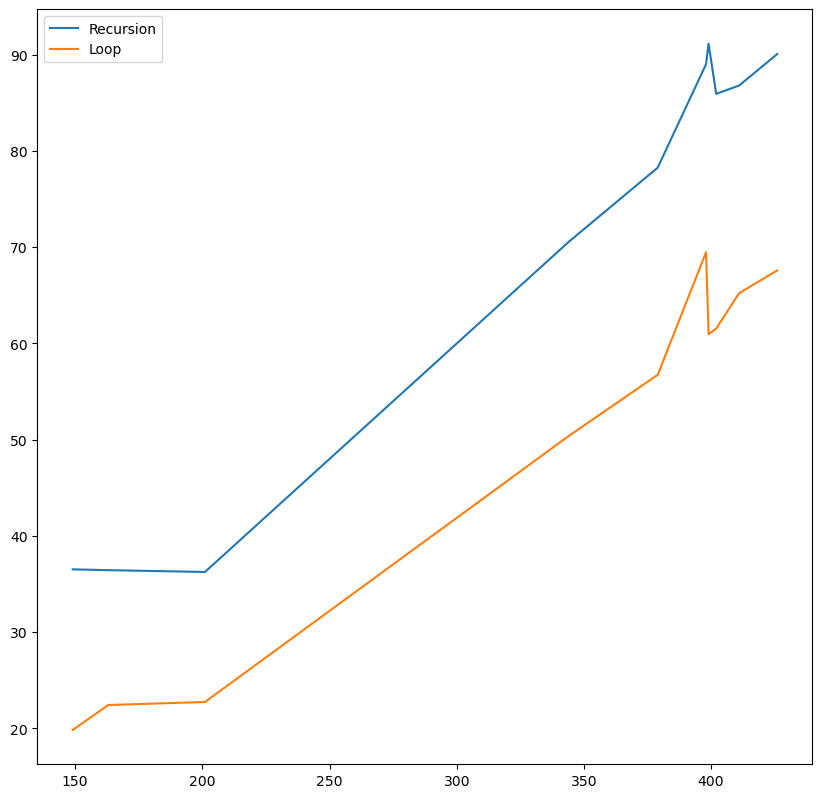

In [17]:
plt.figure(figsize=(10, 10), dpi=100)
plt.plot(df['Number'], df['Recursion Time'], label = 'Recursion');
plt.plot(df['Number'], df['Loop Time'], label = 'Loop');
plt.legend();

# Executive Summary

## For this experiment I created a random array of ten different integers. The goal of this exercise was to test two particular methods of factorializing different numbers. One was to utilize iteration, the other was to utilize an algorithmic method called recursion. Both of these methods tend to run at extremely fast speeds, so at first it was hard to find a way to time the specific measurements. However, since I was aiming to capture overall Big O notation and test out which method ran at a faster speed, I had the code iterate over each of these methods with each number 1000 times. Utilizing this method, I was able to capture the runtime of both of these methods in milliseconds.

## Regarding the results, it was quite clear that they both followed a similar pattern regarding their Big O notations. While they both had slight dips toward the larger numbers when finding factorials, it's clear that they both mostly followed a linear pattern therefore having a Big O notation of around O(n) (but the amount is not perfect). The iteration method performed a lot faster than the recursion algorithm however. The smallest difference between the two was around 13 milliseconds in favor of the iteration method, and the largest was 30 milliseconds in favor of the iteration method. These are miniscule differences in theory, but if this done to a larger amount of numbers in an array or even an extremely large number there would definitely be greater differences. This experiment is helpful to data engineers mainly because it gives them the understanding that while recursion may potentially be easier to read, if machine speed is the name of the game, it might be best to go with the iteration.